Deniz Dalbasi  
Section:009  
Git_reposotory: https://github.com/denizdalbasi/Individual_project

## (1) Data Description
Players.csv file that has 196 lines of code and each line corresponds to a single player from MineCraft server. The dataset includes personal information like their age, gender; also general information like experience level, hours played, and whether they subscribe to the game newsletter. While age, Played_hours are numeric values, Gender and Experience are categorical values.The data set also includes logical variables which is Subscribe. There is a wide variety of genders and experience levels. The two most common levels are Regular and Beginner.

# (2) Questions
- Which player characteristics and behaviours can predict if a player will subscribe to the newsletter?  
- Can a player’s Age, Gender, experience level, and hours played predict if players will subscribe?     

Subscription is the variable we want to predict, and the other variables are the predictors that might reply to our questions. By studying this, we can understand which players are most likely to subscribe and target them for the new plans. Before modelling, the data should be cleaned, for example, by filling missing values which are written as NA. 


In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("https://raw.githubusercontent.com/denizdalbasi/DSCI-100-PROJECT/refs/heads/main/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


In [4]:
players<- players |>
  select(experience, subscribe, played_hours, name, gender, Age)
players

experience,subscribe,played_hours,name,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,30.3,Morgan,Male,9
Veteran,TRUE,3.8,Christian,Male,17
Veteran,FALSE,0.0,Blake,Male,17
Amateur,TRUE,0.7,Flora,Female,21
Regular,TRUE,0.1,Kylie,Male,21
Amateur,TRUE,0.0,Adrian,Female,17
Regular,TRUE,0.0,Luna,Female,19
Amateur,FALSE,0.0,Emerson,Male,21
Amateur,TRUE,0.1,Natalie,Male,47


In [5]:
players |>
  summarise(
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE)
  )

mean_played_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


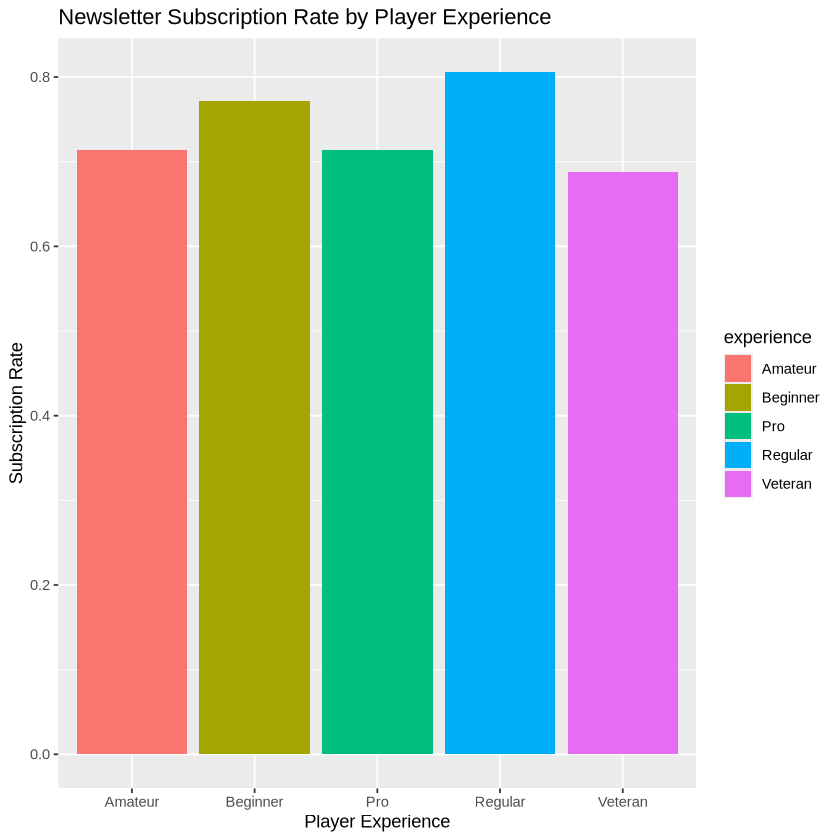

In [6]:
players|>
  group_by(experience) |>
  summarise(subscribe_rate = mean(subscribe, na.rm = TRUE)) |>
  ggplot(aes(x = experience, y = subscribe_rate, fill = experience)) +
  geom_col() +
  labs(
    title = "Newsletter Subscription Rate by Player Experience",
    x = "Player Experience",
    y = "Subscription Rate"
  ) 

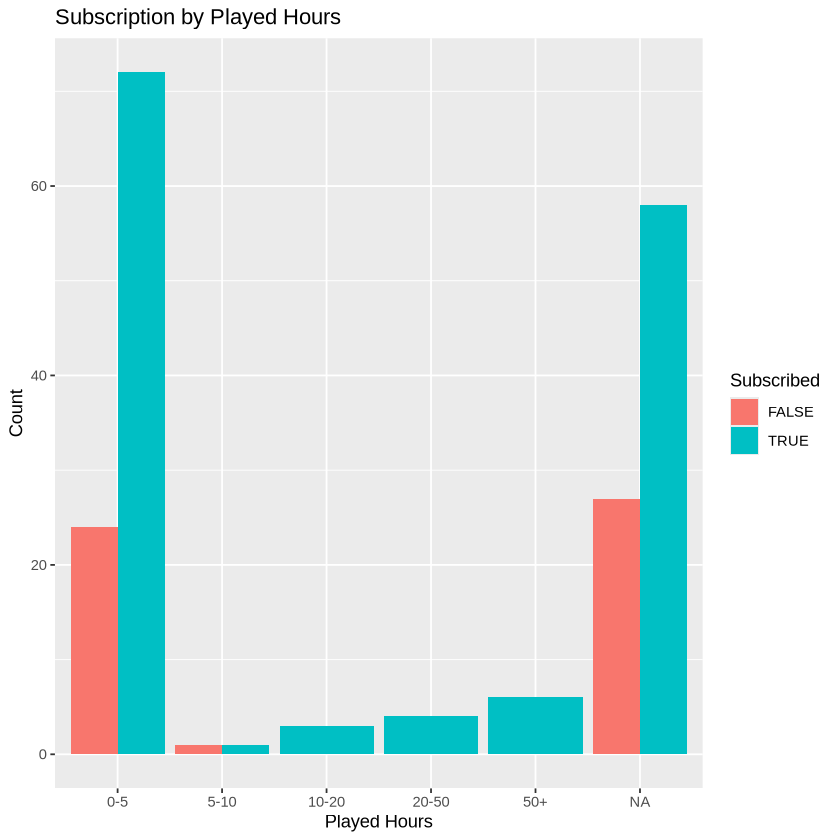

In [7]:
players_clean <- players |>
  mutate(played_bin = cut(played_hours, breaks = c(0, 5, 10, 20, 50, Inf),
                          labels = c("0-5", "5-10", "10-20", "20-50", "50+")))

ggplot(players_clean, aes(x = played_bin, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Subscription by Played Hours",
    x = "Played Hours",
    y = "Count",
    fill = "Subscribed"
  ) 

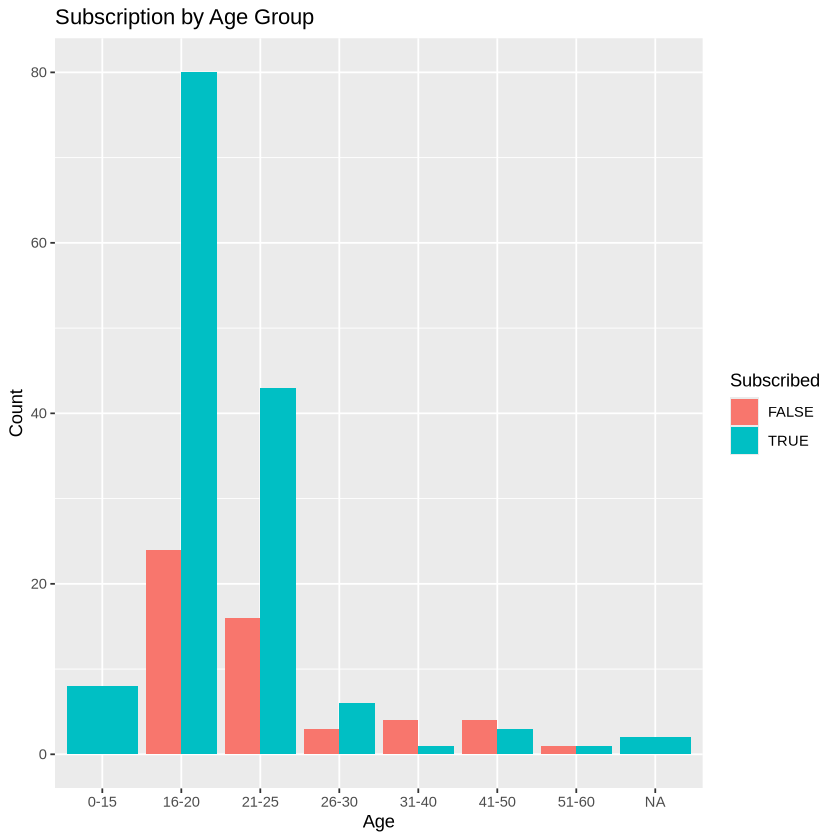

In [8]:
players_clean <- players |>
  mutate(age_bin = cut(Age, breaks = c(0, 15, 20, 25, 30, 40, 50, 60, Inf),
                       labels = c("0-15", "16-20", "21-25", "26-30", "31-40", "41-50", "51-60", "60+")))

ggplot(players_clean, aes(x = age_bin, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(
    title = "Subscription by Age Group",
    x = "Age",
    y = "Count",
    fill = "Subscribed"
  ) 

### (3) Exploratory Data Analysis and Visualization

I created plots to explore how newsletter subscription changes across age groups and played-hours groups. For the age plot, I grouped players into different age ranges and compared how many subscribed in each group. This helps show whether younger or older players are more likely to subscribe, and if some age groups have very few players. And for the played-hours plot, I put players into categories based on how many hours they played. The bar chart lets us see whether players who spend more time on the server are more likely to subscribe.
These simple plots help reveal early patterns and also show possible issues, such as uneven group sizes or players with very high hours.


## (4) Methods and Plan

I plan to use a k-nearest neighbours (KNN) model to answer the question. KNN is a good choice because trying to predict whether a player subscribes (TRUE/FALSE) based on other information like experience, played_hours, Age, and gender. 
KNN assumes that similar players should have similar outcomes. It also works best when the variables are on similar scales, so numeric variables has to be scaled.  

KNN can be slow with larger datasets because it must compare each player to every other player. Another issue is that KNN might struggle when there are too many variables. The model won't work well if the wrong k number is chosen. To check how well the KNN model works, we should look at how often it predicts correctly and how well it guesses. We should also compare results to choose the best k.
The data will be split into a training set and a test set with 7/3 ratio. Experience and gender must be turned into numbers so KNN can use them. Another arrangement should be changing the numers into proper scale. 5-fold cross-validation on the training set to find the best value of k before testing the final model. This helps make the results more reliable.
